<a href="https://colab.research.google.com/github/Nagu34/CSEE5590_Python_DL/blob/master/DLICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [19]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2019-05-03 21:41:17--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.172.177.65, 35.173.3.255, 52.22.145.207, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.172.177.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14991793 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.30M  8.49MB/s    in 1.7s    

2019-05-03 21:41:19 (8.49 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14991793/14991793]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [21]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://cc589d6c.ngrok.io


In [1]:
!pip install tensorboardcolab

In [2]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://aa3228a9.ngrok.io


Instructions for updating:
Colocations handled automatically by placer.
11493376/11490434 [==============================] - 1s 0us/step
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.3641 - val_loss: 0.2711
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2635 - val_loss: 0.2525
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2434 - val_loss: 0.2321
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2243 - val_loss: 0.2138
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2084 - val_loss: 0.2004
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1968 - val_loss: 0.1903
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1878 - val_loss: 0.1824
Epoch 8/20
60000/60000 [======

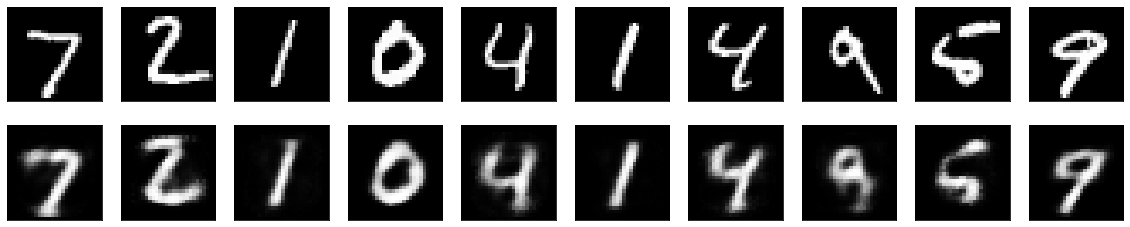

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32 
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) 

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

hidden_1 = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[TensorBoardColabCallback(tbc)])

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3478 - val_loss: 0.2681
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2622 - val_loss: 0.2523
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2413 - val_loss: 0.2277
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2201 - val_loss: 0.2107
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2055 - val_loss: 0.1986
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1964 - val_loss: 0.1913
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1895 - val_loss: 0.1849
Epoch 8/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1840 - val_loss: 0.1802
Epoch 9/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1790 - val_loss: 0.1752
Epoch

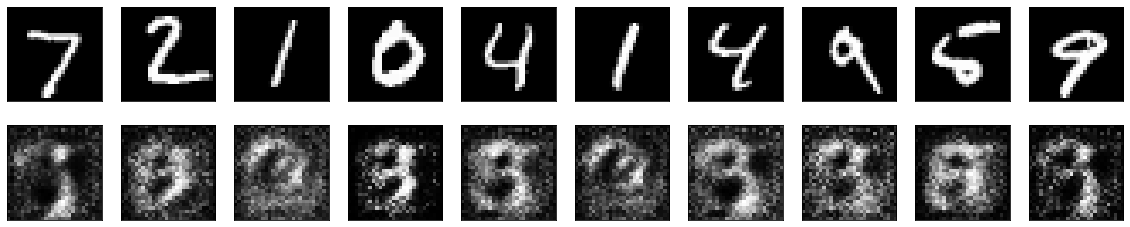

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32 
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) 

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

hidden_1 = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[TensorBoardColabCallback(tbc)])

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.6593 - acc: 0.7590 - val_loss: 0.4676 - val_acc: 0.7776
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.3068 - acc: 0.7950 - val_loss: 0.2868 - val_acc: 0.7955
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2814 - acc: 0.7958 - val_loss: 0.2769 - val_acc: 0.7959
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2738 - acc: 0.7976 - val_loss: 0.2709 - val_acc: 0.7956
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2685 - acc: 0.7994 - val_loss: 0.2660 - val_acc: 0.7977
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2640 - acc: 0.8008 - val_loss: 0.2617 - val_acc: 0.7998
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2597 - acc: 0.8017 - val_loss: 0.2573 - val_acc

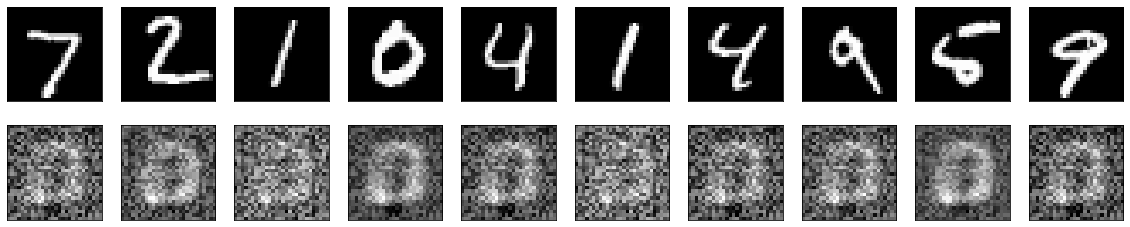

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
# this is the size of our encoded representations
encoding_dim = 32 
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) 

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-6))(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])



from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[TensorBoardColabCallback(tbc)])

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.5678 - acc: 0.7316 - val_loss: 0.3345 - val_acc: 0.7941
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.3221 - acc: 0.7943 - val_loss: 0.3134 - val_acc: 0.7932
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.3091 - acc: 0.7945 - val_loss: 0.3053 - val_acc: 0.7934
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.3028 - acc: 0.7949 - val_loss: 0.3002 - val_acc: 0.7929
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2984 - acc: 0.7953 - val_loss: 0.2965 - val_acc: 0.7943
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2951 - acc: 0.7958 - val_loss: 0.2936 - val_acc: 0.7953
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2924 - acc: 0.7965 - val_loss: 0.2911 - val_acc

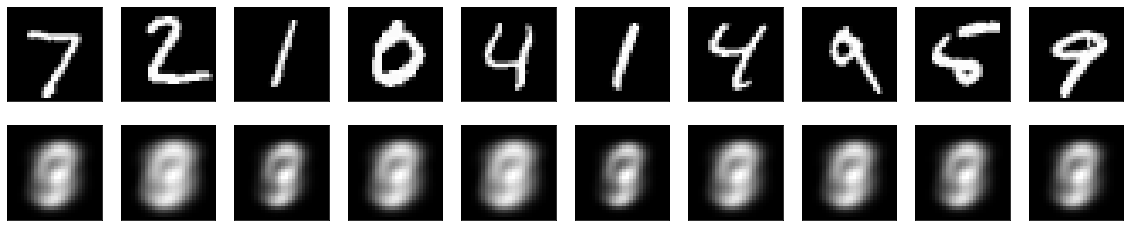

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
# this is the size of our encoded representations
encoding_dim = 32 
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) 

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-6))(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])



from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[TensorBoardColabCallback(tbc)])

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3522 - acc: 0.7588 - val_loss: 0.2716 - val_acc: 0.7932
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2653 - acc: 0.7977 - val_loss: 0.2550 - val_acc: 0.7966
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2446 - acc: 0.7984 - val_loss: 0.2317 - val_acc: 0.7973
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2238 - acc: 0.7977 - val_loss: 0.2134 - val_acc: 0.7977
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2081 - acc: 0.7983 - val_loss: 0.2004 - val_acc: 0.7983
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1971 - acc: 0.7993 - val_loss: 0.1912 - val_acc: 0.7999
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1888 - acc: 0.8005 - val_loss: 0.1836 - val_acc

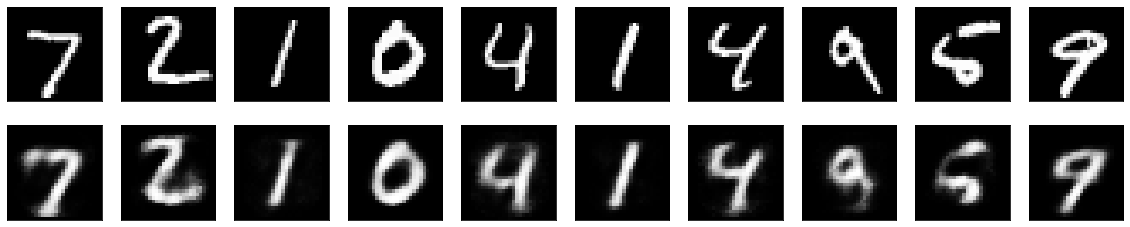

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
# this is the size of our encoded representations
encoding_dim = 32 
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) 

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])



from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[TensorBoardColabCallback(tbc)])

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()